In [7]:
from scipy.interpolate import interp1d
from astropy.io import fits
import os 
import shutil
import glob
import matplotlib.pyplot as plt 
import numpy as np 

In [12]:
def interpolar_espectro(ruta_carpeta, num_puntos=50000,plot=True):
    
    if not os.path.exists(ruta_carpeta):
        raise FileNotFoundError(f"La carpeta {ruta_carpeta} no existe")
    
    patron = os.path.join(ruta_carpeta, "*AIR_modificado.par_tac.fits")
    archivos = glob.glob(patron)
    
    if not archivos:
        print(f"No se encontraron archivos en {ruta_carpeta}")
        return None, None
    
    print(f"Leyendo {len(archivos)} archivos FITS...")
    
    # Recolectar todos los rangos de longitud de onda para definir la grilla común
    lambdas = []
    fluxes = []
    
    for archivo in archivos:
        with fits.open(archivo) as hdul:  # Usamos with para cerrar automáticamente
            datos = hdul[1].data
            longitud_onda = datos['LAMBDA']*1e4
            flujo_corregido = datos['CFLUX']
            
            lambdas.append(longitud_onda)
            fluxes.append(flujo_corregido)
    
    # Grilla común: desde el mínimo global hasta el máximo global
    w_min = min(np.min(l) for l in lambdas)
    w_max = max(np.max(l) for l in lambdas)
    long_onda_nueva = np.linspace(w_min, w_max, num_puntos)
    
    # Acumular el flujo interpolado y contar cuántos espectros contribuyen en cada punto
    flux_acumulado = np.zeros_like(long_onda_nueva)
    contador = np.zeros_like(long_onda_nueva)
    
    
    for lam, flx in zip(lambdas, fluxes):
        # Interpolación lineal
        f_interp = interp1d(lam, flx, kind='linear', bounds_error=False, fill_value=1)
        flux_interp = f_interp(long_onda_nueva)
        
        flux_acumulado += flux_interp
        contador += (flux_interp != 0)  # Solo contar donde hay datos reales
    
    # Promedio ponderado (evita dividir por cero)
    with np.errstate(invalid='ignore'):
        flux_promedio = np.where(contador > 0, flux_acumulado / contador, 0)
        
    print(f"se leyeron e interpolaron correctamente los espectros")

    if plot:
        fig = plt.figure(figsize=(15,12))
        ax = fig.add_subplot(111)
        ax.plot(long_onda_nueva,flux_promedio,label = 'Interpolado')

        ax.set_xlabel(r'longitud de onda')
        ax.set_ylabel('Flujo normalizado')
        ax.set_title('Espectro interpolado')
        ax.legend(ncol=2)
        ax.grid(True, alpha=0.3)
        plt.show()
    
    return long_onda_nueva, flux_promedio

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


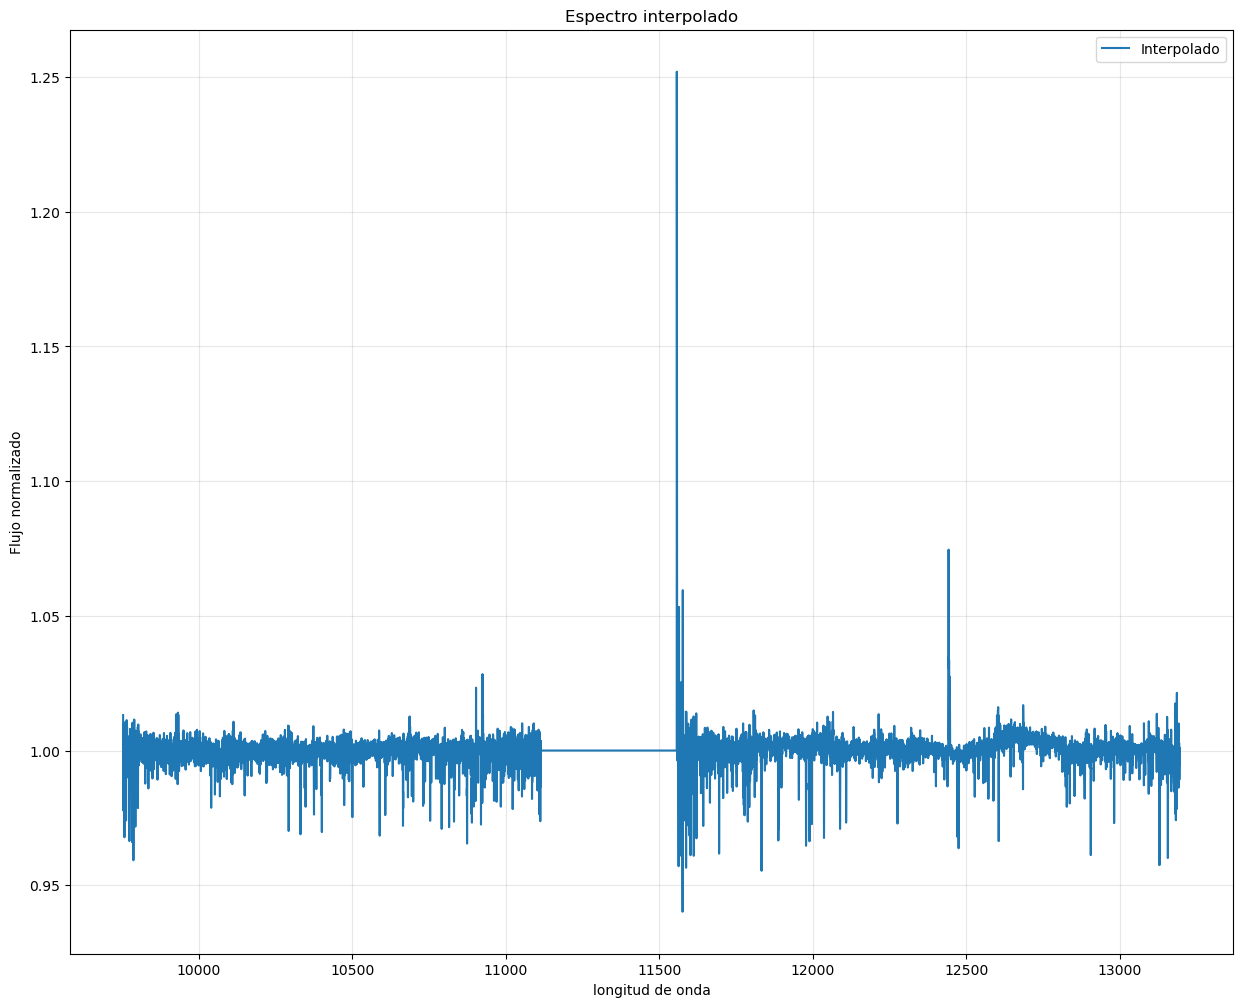

In [13]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star1/"
long,flux = interpolar_espectro(carpeta)

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


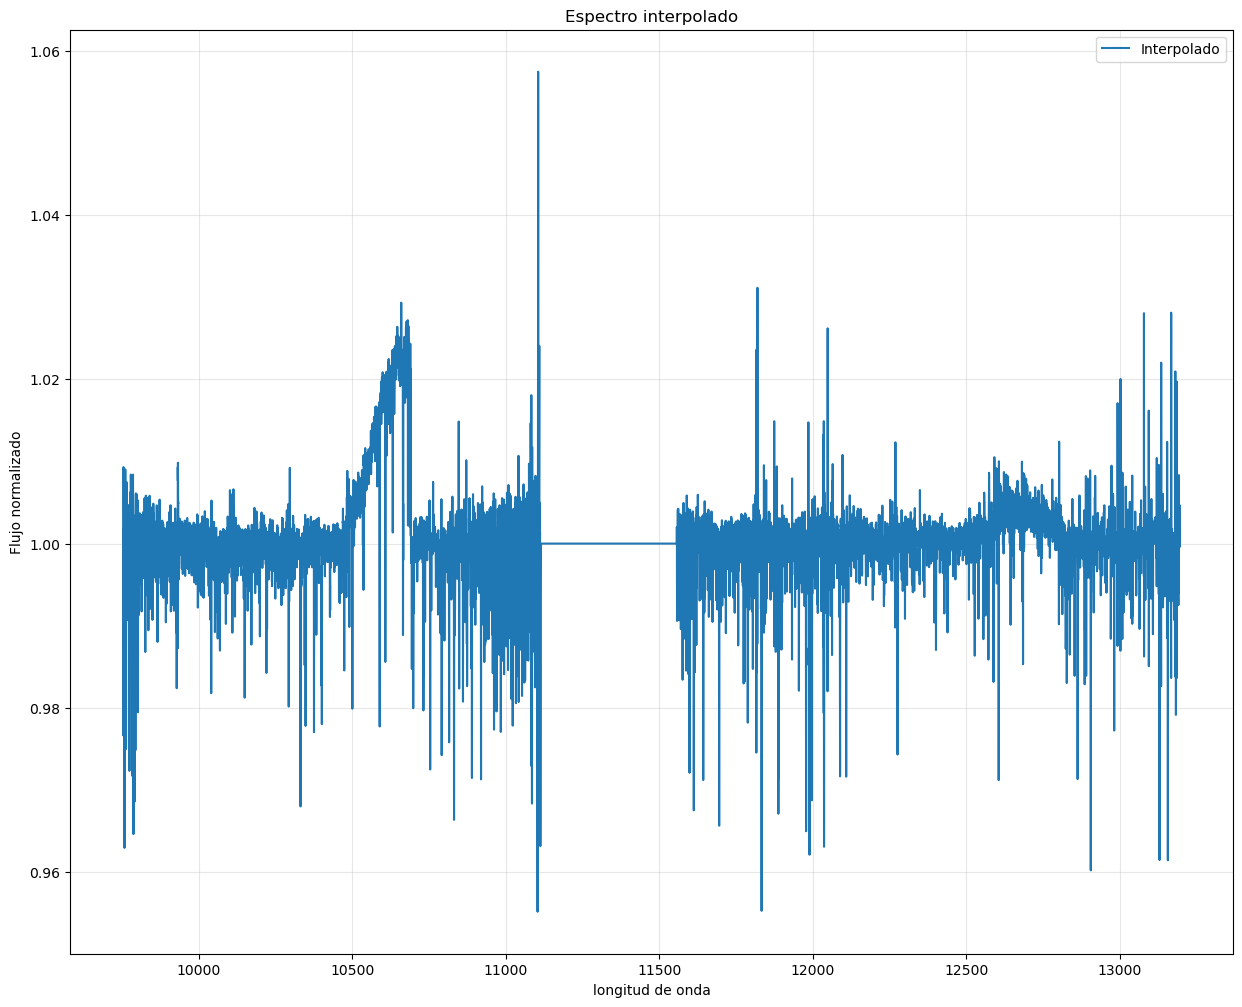

In [14]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star3/"
long,flux = interpolar_espectro(carpeta)

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


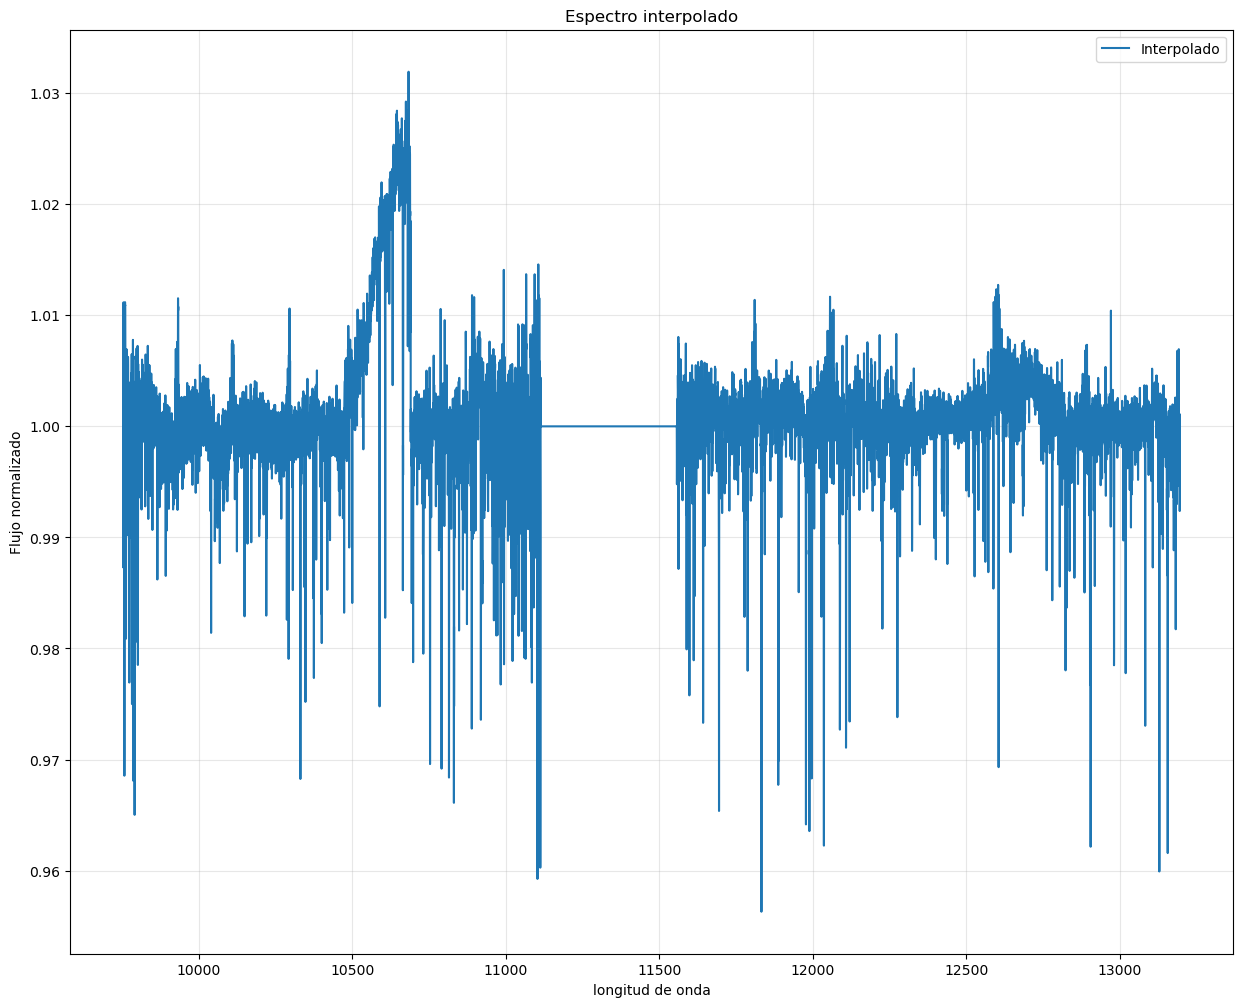

In [15]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star4/"
long,flux = interpolar_espectro(carpeta)

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


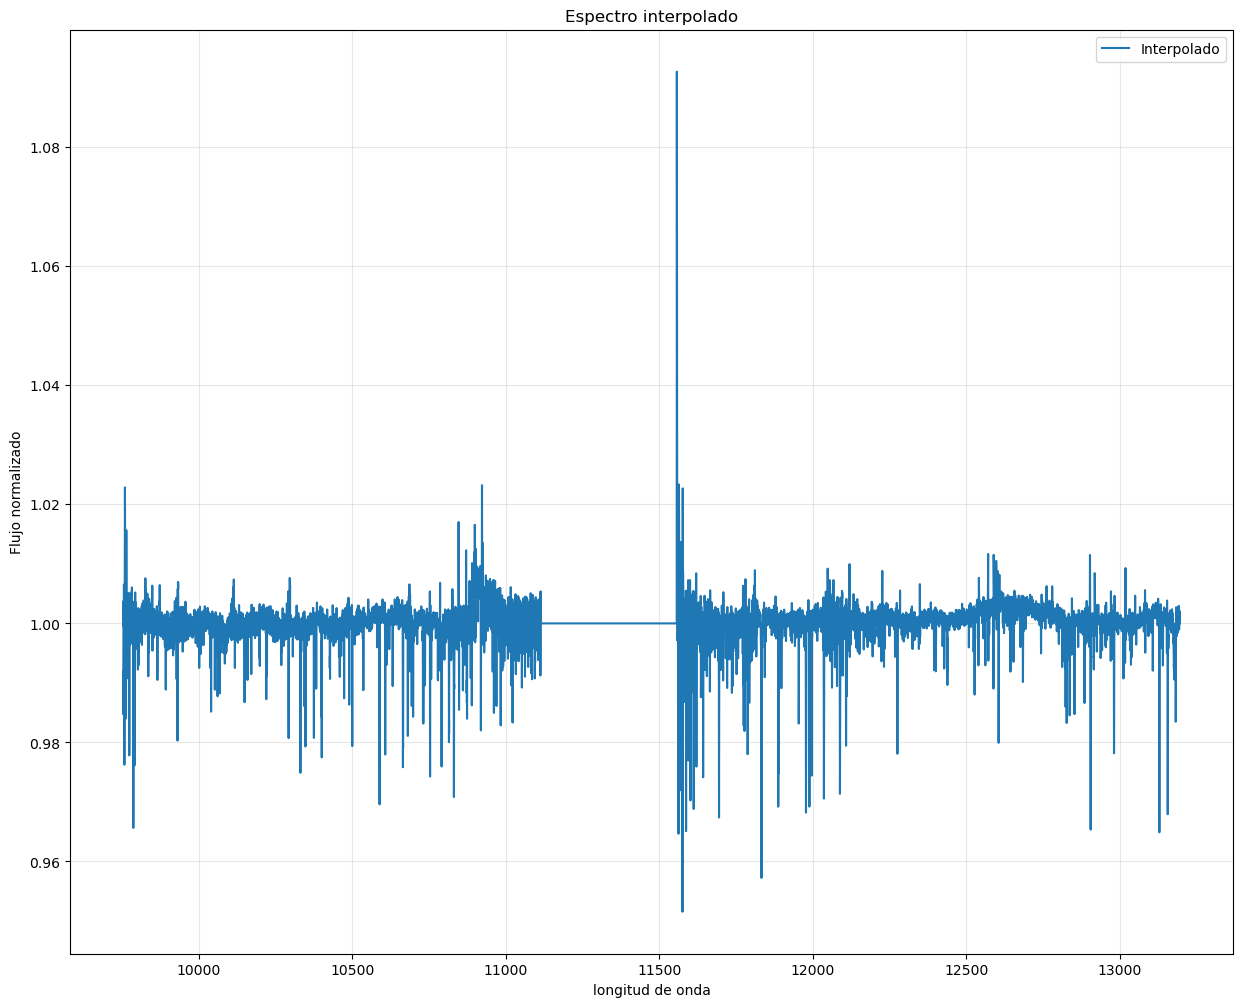

In [16]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star7/"
long,flux = interpolar_espectro(carpeta)

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


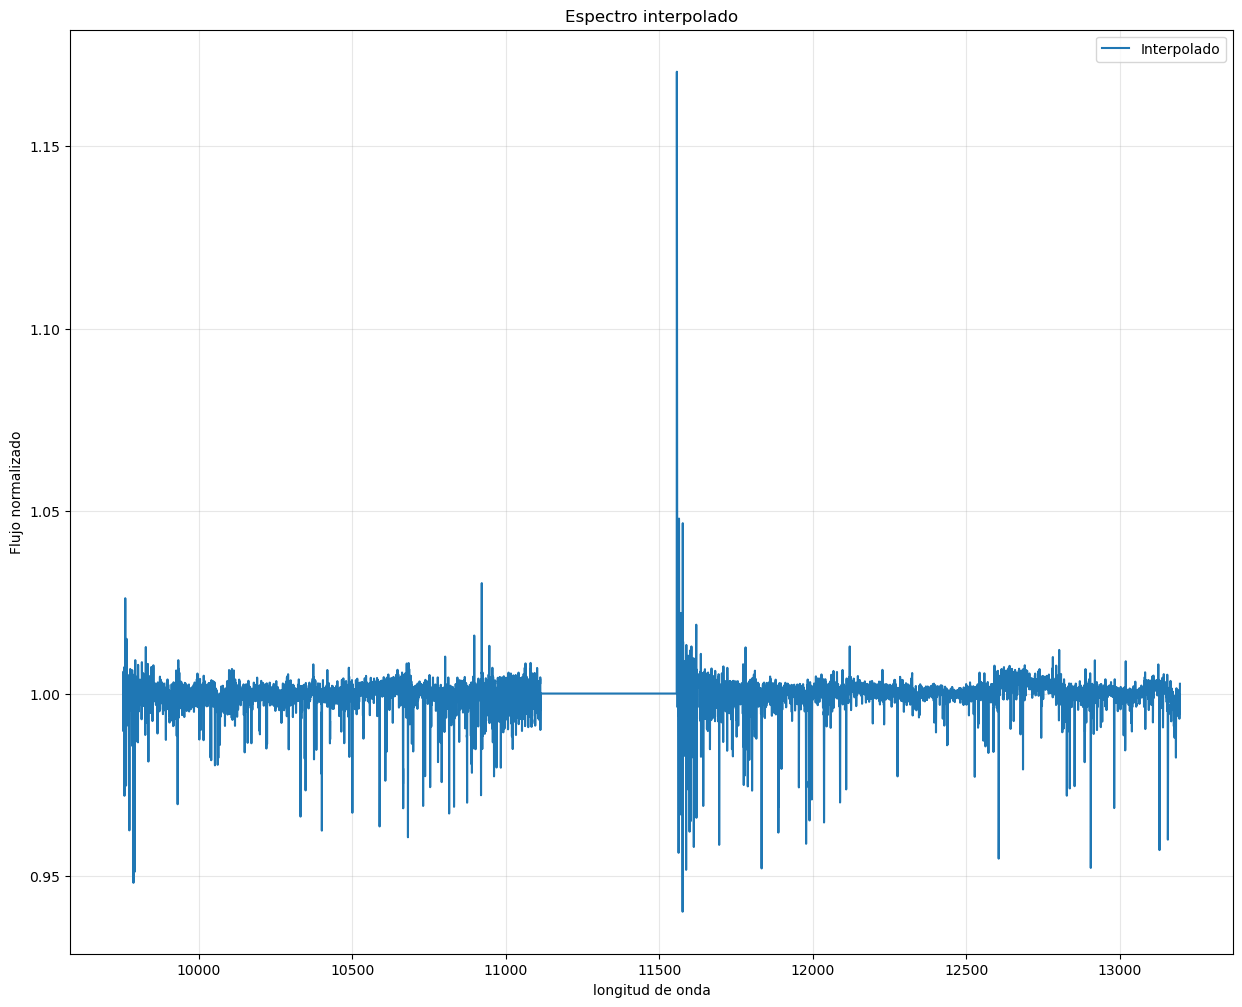

In [17]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star8/"
long,flux = interpolar_espectro(carpeta)

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


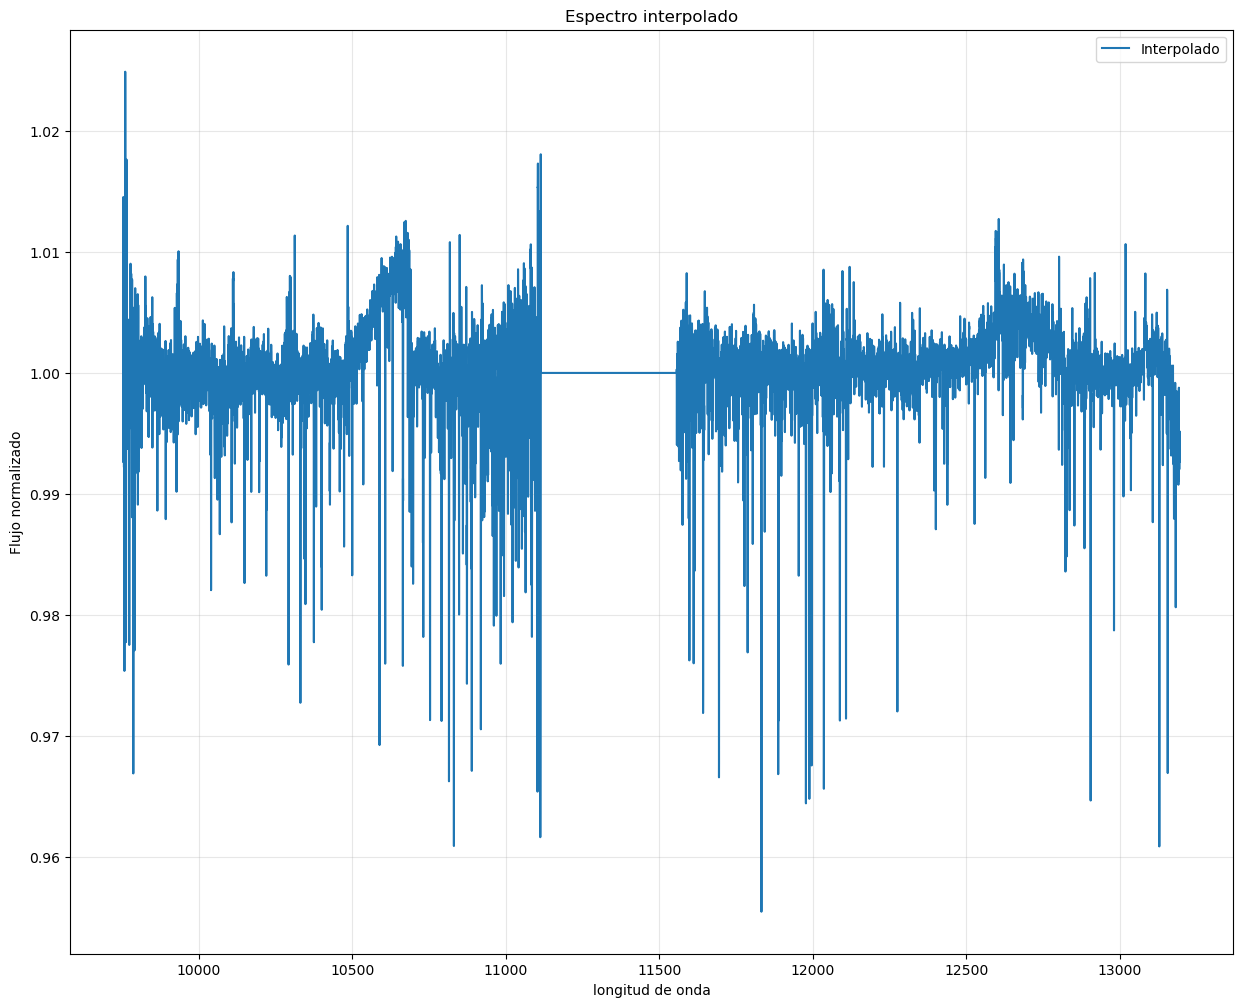

In [18]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star9/"
long,flux = interpolar_espectro(carpeta)